In [127]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import scipy.stats as stats

plt.rcParams['font.family'] = 'SimHei' #设置字体
plt.rcParams['axes.unicode_minus']=False #坐标轴的负号正常显示

In [142]:
df_h= pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\Problem_C_Data_Wordle - 副本.csv')
df3.head() 

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\86180\\Desktop\\美赛\\2023\\Problem_C_Data_Wordle - 副本.csv'

In [108]:
df_h= pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\1.2困难模式比例每日波动.csv')
dif = df_h['dif']

In [ ]:
## 不符合正态分布

In [109]:
dif.describe()

count    306.000000
mean       0.000003
std        0.003475
min       -0.007990
25%       -0.001860
50%       -0.000557
75%        0.001064
max        0.036258
Name: dif, dtype: float64

In [111]:
# 偏度
dif.skew()

4.538482533993969

In [113]:
# 峰度
dif.kurtosis()

40.619666172179585

In [114]:
df=pd.read_excel("特征归一化.xlsx")
df.head()

,Unnamed: 0,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),e,...,a,o,i,th,he,in,er,an,Frequency,Char_repitions
0,0,slump,1,3,23,39,24,9,1,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0.000661,0.0
1,1,crank,1,5,23,31,24,14,2,0.0,...,0.5,0.0,0.0,0,0,0,0,1,0.000765,0.0
2,2,gorge,1,3,13,27,30,22,4,0.5,...,0.0,0.5,0.0,0,0,0,0,0,0.001304,0.5
3,3,query,1,4,16,30,30,17,2,0.5,...,0.0,0.0,0.0,0,0,0,1,0,0.005003,0.0
4,4,drink,1,9,35,34,16,5,1,0.0,...,0.0,0.0,0.5,0,0,1,0,0,0.027824,0.0


In [143]:
df_p= pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\Dirichlet回归预测原来的尝试次数分布情况.csv')
df_p.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7
0,1,0.010119,0.038325,0.173262,0.312399,0.272432,0.155449,0.038014
1,2,0.014817,0.052235,0.183515,0.285266,0.247525,0.162328,0.054314
2,3,0.008364,0.036285,0.167796,0.309045,0.279018,0.161171,0.038322
3,4,0.007492,0.024470,0.145768,0.326853,0.305894,0.160440,0.029083
4,5,0.013361,0.065062,0.236232,0.327561,0.231962,0.107193,0.018631


In [144]:
df_e=df_p.iloc[::-1]
df_e = df_e.iloc[:,1:8]
df_e.head()

,V1,V2,V3,V4,V5,V6,V7
358,0.004475,0.050228,0.222638,0.359082,0.243681,0.099694,0.020201
357,0.004848,0.068451,0.252223,0.342873,0.216201,0.092003,0.023400
356,0.003244,0.052366,0.251169,0.382680,0.226530,0.073608,0.010403
355,0.002729,0.044872,0.231748,0.380878,0.240112,0.084977,0.014684
354,0.003891,0.037077,0.181173,0.342813,0.274602,0.130370,0.030074


In [145]:
E_e=df_e['V1']+df_e['V2']*2+df_e['V3']*3+df_e['V4']*4+df_e['V5']*5+df_e['V6']*6+df_e['V7']*7
len(E_e.values)

359

In [146]:
E_o=df_o['1 try']+df_o['2 tries']*2+df_o['3 tries']*3+df_o['4 tries']*4+df_o['5 tries']*5+df_o['6 tries']*6+df_o['7 or more tries (X)']*7
len(E_o.values)

359

In [147]:
df_e.iloc[0].values

array([0.00447538, 0.0502284 , 0.22263794, 0.35908201, 0.24368105,
       0.09969448, 0.02020075])

In [ ]:
df_p

In [148]:
from scipy import stats
p=stats.chisquare(df_o.iloc[38].values,100* df_e.iloc[38].values)
p

Power_divergenceResult(statistic=7.608285956899118, pvalue=0.2682281728111906)

In [150]:
p_value=[]
for i in range(359):
    p=stats.chisquare(df_o.iloc[i].values,100* df_e.iloc[i].values)
    p_value.append(p)
p_value

[Power_divergenceResult(statistic=2.4021341920198997, pvalue=0.8792556062507262),
 Power_divergenceResult(statistic=4.371152605725167, pvalue=0.6265838538534008),
 Power_divergenceResult(statistic=51.44340042213908, pvalue=2.4127565336699827e-09),
 Power_divergenceResult(statistic=16.12147046328027, pvalue=0.013116625393009985),
 Power_divergenceResult(statistic=34.619397701177974, pvalue=5.106451814393041e-06),
 Power_divergenceResult(statistic=13.908904044573498, pvalue=0.030670475710039426),
 Power_divergenceResult(statistic=54.31223284244892, pvalue=6.381333954649285e-10),
 Power_divergenceResult(statistic=15.192637474140305, pvalue=0.01881019737738789),
 Power_divergenceResult(statistic=13.472744322190964, pvalue=0.0361136768908298),
 Power_divergenceResult(statistic=52.16728055133943, pvalue=1.7258168359048004e-09),
 Power_divergenceResult(statistic=4.2149443475310475, pvalue=0.6476141096456316),
 Power_divergenceResult(statistic=209.18706813631985, pvalue=2.0984030795008958e-42)

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [136]:
model1 = SelectKBest(chi2, k=1)#选择k个最佳特征
model1.fit_transform(df1[['Frequency','5m1','5m2']],df1['Hard'].values)#iris.data是特征数据，iris.target是标签数据，该函数可以选择出k个特征
model1.scores
#[df1['Frequency'],df1['5m1'],df1['5m2']]

ValueError: Unknown label type: (array([0.09317959, 0.09304848, 0.0959452 , 0.09608135, 0.09636477,
       0.10209385, 0.10042433, 0.09422612, 0.0962757 , 0.09926794,
       0.09179441, 0.09367361, 0.09311803, 0.0951006 , 0.09348138,
       0.09451713, 0.0959145 , 0.09834806, 0.09227833, 0.09399729,
       0.09454595, 0.09646925, 0.09158206, 0.0878815 , 0.09590747,
       0.09617593, 0.09502008, 0.09375611, 0.09466762, 0.09506614,
       0.09722468, 0.93616193, 0.09756098, 0.09535143, 0.09346981,
       0.09188431, 0.0962516 , 0.0983577 , 0.09192514, 0.09235704,
       0.09807312, 0.09587451, 0.09697362, 0.09925363, 0.09211724,
       0.09935095, 0.09645132, 0.09296804, 0.10025912, 0.09553933,
       0.09379448, 0.09374886, 0.0923958 , 0.09300702, 0.0934626 ,
       0.09698082, 0.09249235, 0.09385291, 0.09538472, 0.09541019,
       0.13333576, 0.09706393, 0.10116732, 0.10081094, 0.09446336,
       0.09471549, 0.09659715, 0.09729562, 0.09562304, 0.10317975,
       0.0966167 , 0.09756609, 0.0963432 , 0.09865123, 0.09803579,
       0.09482235, 0.09369973, 0.10272013, 0.09520515, 0.09842997,
       0.1010943 , 0.09630796, 0.09874247, 0.09391721, 0.09819736,
       0.09784331, 0.09184552, 0.09326006, 0.09558318, 0.09195367,
       0.09222946, 0.09559606, 0.09156711, 0.0928241 , 0.09590177,
       0.09320639, 0.0909607 , 0.09232945, 0.0938768 , 0.09181504,
       0.09052387, 0.09069302, 0.09089746, 0.0978602 , 0.09177693,
       0.09195643, 0.11069715, 0.0903011 , 0.09140688, 0.09173814,
       0.09891241, 0.09592283, 0.09498239, 0.09042024, 0.09389275,
       0.09270134, 0.09231991, 0.09073412, 0.0902305 , 0.09223815,
       0.08814802, 0.0917782 , 0.08957927, 0.08939394, 0.08961232,
       0.09485669, 0.08911366, 0.08774052, 0.08642513, 0.0868546 ,
       0.08742436, 0.08702073, 0.08945167, 0.08495228, 0.08794347,
       0.0907894 , 0.08859416, 0.08793619, 0.08989145, 0.09376975,
       0.09028801, 0.08994678, 0.08694137, 0.08795878, 0.08334484,
       0.0897342 , 0.08806559, 0.08740764, 0.09178046, 0.08960756,
       0.08668352, 0.09682317, 0.09009328, 0.08583439, 0.08489278,
       0.08502024, 0.08585486, 0.08558253, 0.08953052, 0.08511777,
       0.08542436, 0.08460932, 0.08503678, 0.08614338, 0.08724578,
       0.08465475, 0.08333725, 0.08444624, 0.08460368, 0.08546159,
       0.08355323, 0.08059075, 0.0824984 , 0.08459736, 0.08361852,
       0.08351382, 0.08139046, 0.08457161, 0.08552298, 0.08084705,
       0.08420682, 0.08548634, 0.08416138, 0.08025737, 0.08499955,
       0.08669077, 0.08124789, 0.08019006, 0.07837463, 0.07962854,
       0.07884703, 0.07753573, 0.08103683, 0.07862472, 0.07824261,
       0.07946314, 0.08687639, 0.07776457, 0.07696051, 0.07842612,
       0.07940902, 0.07698599, 0.07626491, 0.07865969, 0.07808437,
       0.07772409, 0.07549241, 0.07526572, 0.07777284, 0.07629807,
       0.07606886, 0.0757592 , 0.07784197, 0.07585269, 0.07650395,
       0.07776083, 0.07802741, 0.075946  , 0.07583874, 0.07490346,
       0.07708496, 0.07587567, 0.07385106, 0.0725677 , 0.07443051,
       0.07495278, 0.07278624, 0.07498681, 0.07270722, 0.07577287,
       0.0739477 , 0.07224309, 0.07117355, 0.07161075, 0.0715958 ,
       0.07376498, 0.06910898, 0.07247856, 0.07028123, 0.0718555 ,
       0.07342491, 0.06722042, 0.06922871, 0.06827473, 0.07338587,
       0.07371363, 0.0656434 , 0.07097579, 0.06632514, 0.06621233,
       0.07153624, 0.06919304, 0.06783031, 0.06483998, 0.07105303,
       0.06662288, 0.07528076, 0.06532127, 0.06569117, 0.06514673,
       0.06555838, 0.06484028, 0.0635674 , 0.06331207, 0.06588484,
       0.06253119, 0.06360927, 0.06382918, 0.0643252 , 0.06414608,
       0.06346617, 0.06126447, 0.06368644, 0.06006616, 0.06161855,
       0.06263173, 0.05892285, 0.05697994, 0.061101  , 0.06004182,
       0.06271278, 0.05700513, 0.05511457, 0.05456517, 0.05498842,
       0.0529844 , 0.05430778, 0.05447473, 0.05173775, 0.05232713,
       0.05156617, 0.04941461, 0.05055392, 0.04980606, 0.04870111,
       0.05478266, 0.04768197, 0.04675444, 0.04707601, 0.04493698,
       0.04533955, 0.04525979, 0.04611986, 0.0436009 , 0.04202422,
       0.04404569, 0.04190064, 0.04168314, 0.04061394, 0.04566893,
       0.04150809, 0.04110946, 0.03856298, 0.03905916, 0.04059186,
       0.03981553, 0.03853143, 0.03733008, 0.03707015, 0.03593366,
       0.03954941, 0.01170933, 0.03449617, 0.03812772, 0.04422137,
       0.04534142, 0.04570897, 0.0462828 , 0.04410034, 0.04287797,
       0.04118394, 0.04078721, 0.03925031, 0.03869045, 0.03910475,
       0.0391059 , 0.03700913, 0.0375394 , 0.03450718, 0.03361358,
       0.03150461, 0.03223169, 0.02826669, 0.02836568, 0.02706711,
       0.02700808, 0.02527956, 0.0280878 , 0.02538288, 0.02363925,
       0.02261026, 0.02351254, 0.0252023 , 0.02233512, 0.01960619,
       0.02092706, 0.02091236, 0.01736894, 0.01689198]),)

In [ ]:
model1
model1.pvalues_

In [129]:
p_value[1]>0.95

TypeError: '>' not supported between instances of 'Power_divergenceResult' and 'float'

In [102]:
df = pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\数据分布归一化.csv')
df.iloc[38].values

array([38, 'cynic', 1.0, 6.0, 25.0, 33.0, 22.0, 11.0, 2.0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 6.164864e-07], dtype=object)

In [103]:
df_p.iloc[38].values

array([3.90000000e+01, 5.41833623e-03, 2.62324458e-02, 1.64061262e-01,
       3.37819011e-01, 2.84078625e-01, 1.49422463e-01, 3.29678561e-02])

In [62]:
df_o=df.iloc[:,2:9]
df_o.head()

,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000
1,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000
2,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000
3,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000
4,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099


In [11]:
df['Hard']=df['Number in hard mode']/df['Number of  reported results']

In [27]:
df['5m1']=df['e']+df['t']+df['a']+df['o']+df['i']
df['5m2']=df['th']+df['he']+df['in']+df['er']+df['an']

In [33]:
df.iloc[5:10,23:]

,Frequency,Hard,5m1,5m2
5,0.000052,0.102094,1,0
6,0.000039,0.100424,3,0
7,0.000001,0.094226,3,0
8,0.000003,0.096276,4,0
9,0.000006,0.099268,2,0


In [13]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [36]:
score_linear = []
for i in range(100):
    X = df.iloc[:,25:26]
    y = df['Hard']

    Xtrain, Xtest, ytrain, ytest = train_test_split(
        X, y, random_state=i, test_size=0.2)

    model = LinearRegression()

    model.fit(Xtrain, ytrain)
    score_linear.append(model.score(Xtest, ytest))

np.mean(score_linear)

-0.058768028028564456

In [37]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


df1 = df.iloc[:,23:]
correlations = df1.corr('spearman')
correlations.fillna(0,inplace=True)

In [43]:
correlations 

,Frequency,Hard,5m1,5m2
Frequency,1.000000,-0.078241,0.072435,0.063752
Hard,-0.078241,1.000000,0.055540,-0.082520
5m1,0.072435,0.055540,1.000000,0.088698
5m2,0.063752,-0.082520,0.088698,1.000000


In [47]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1].round(4)
(df1.corr(method=PvalueGetSpearman))
#(df1.corr(method=PvalueGetSpearman)>0.05)

,Frequency,Hard,5m1,5m2
Frequency,1.0000,0.1390,0.1709,0.2282
Hard,0.1390,1.0000,0.2940,0.1186
5m1,0.1709,0.2940,1.0000,0.0933
5m2,0.2282,0.1186,0.0933,1.0000


In [42]:
cmap = sns.color_palette('vlag', as_cmap=True)

In [140]:
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":500,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

In [154]:
df1.columns

Index(['Frequency', 'Hard', '5m1', '5m2'], dtype='object')

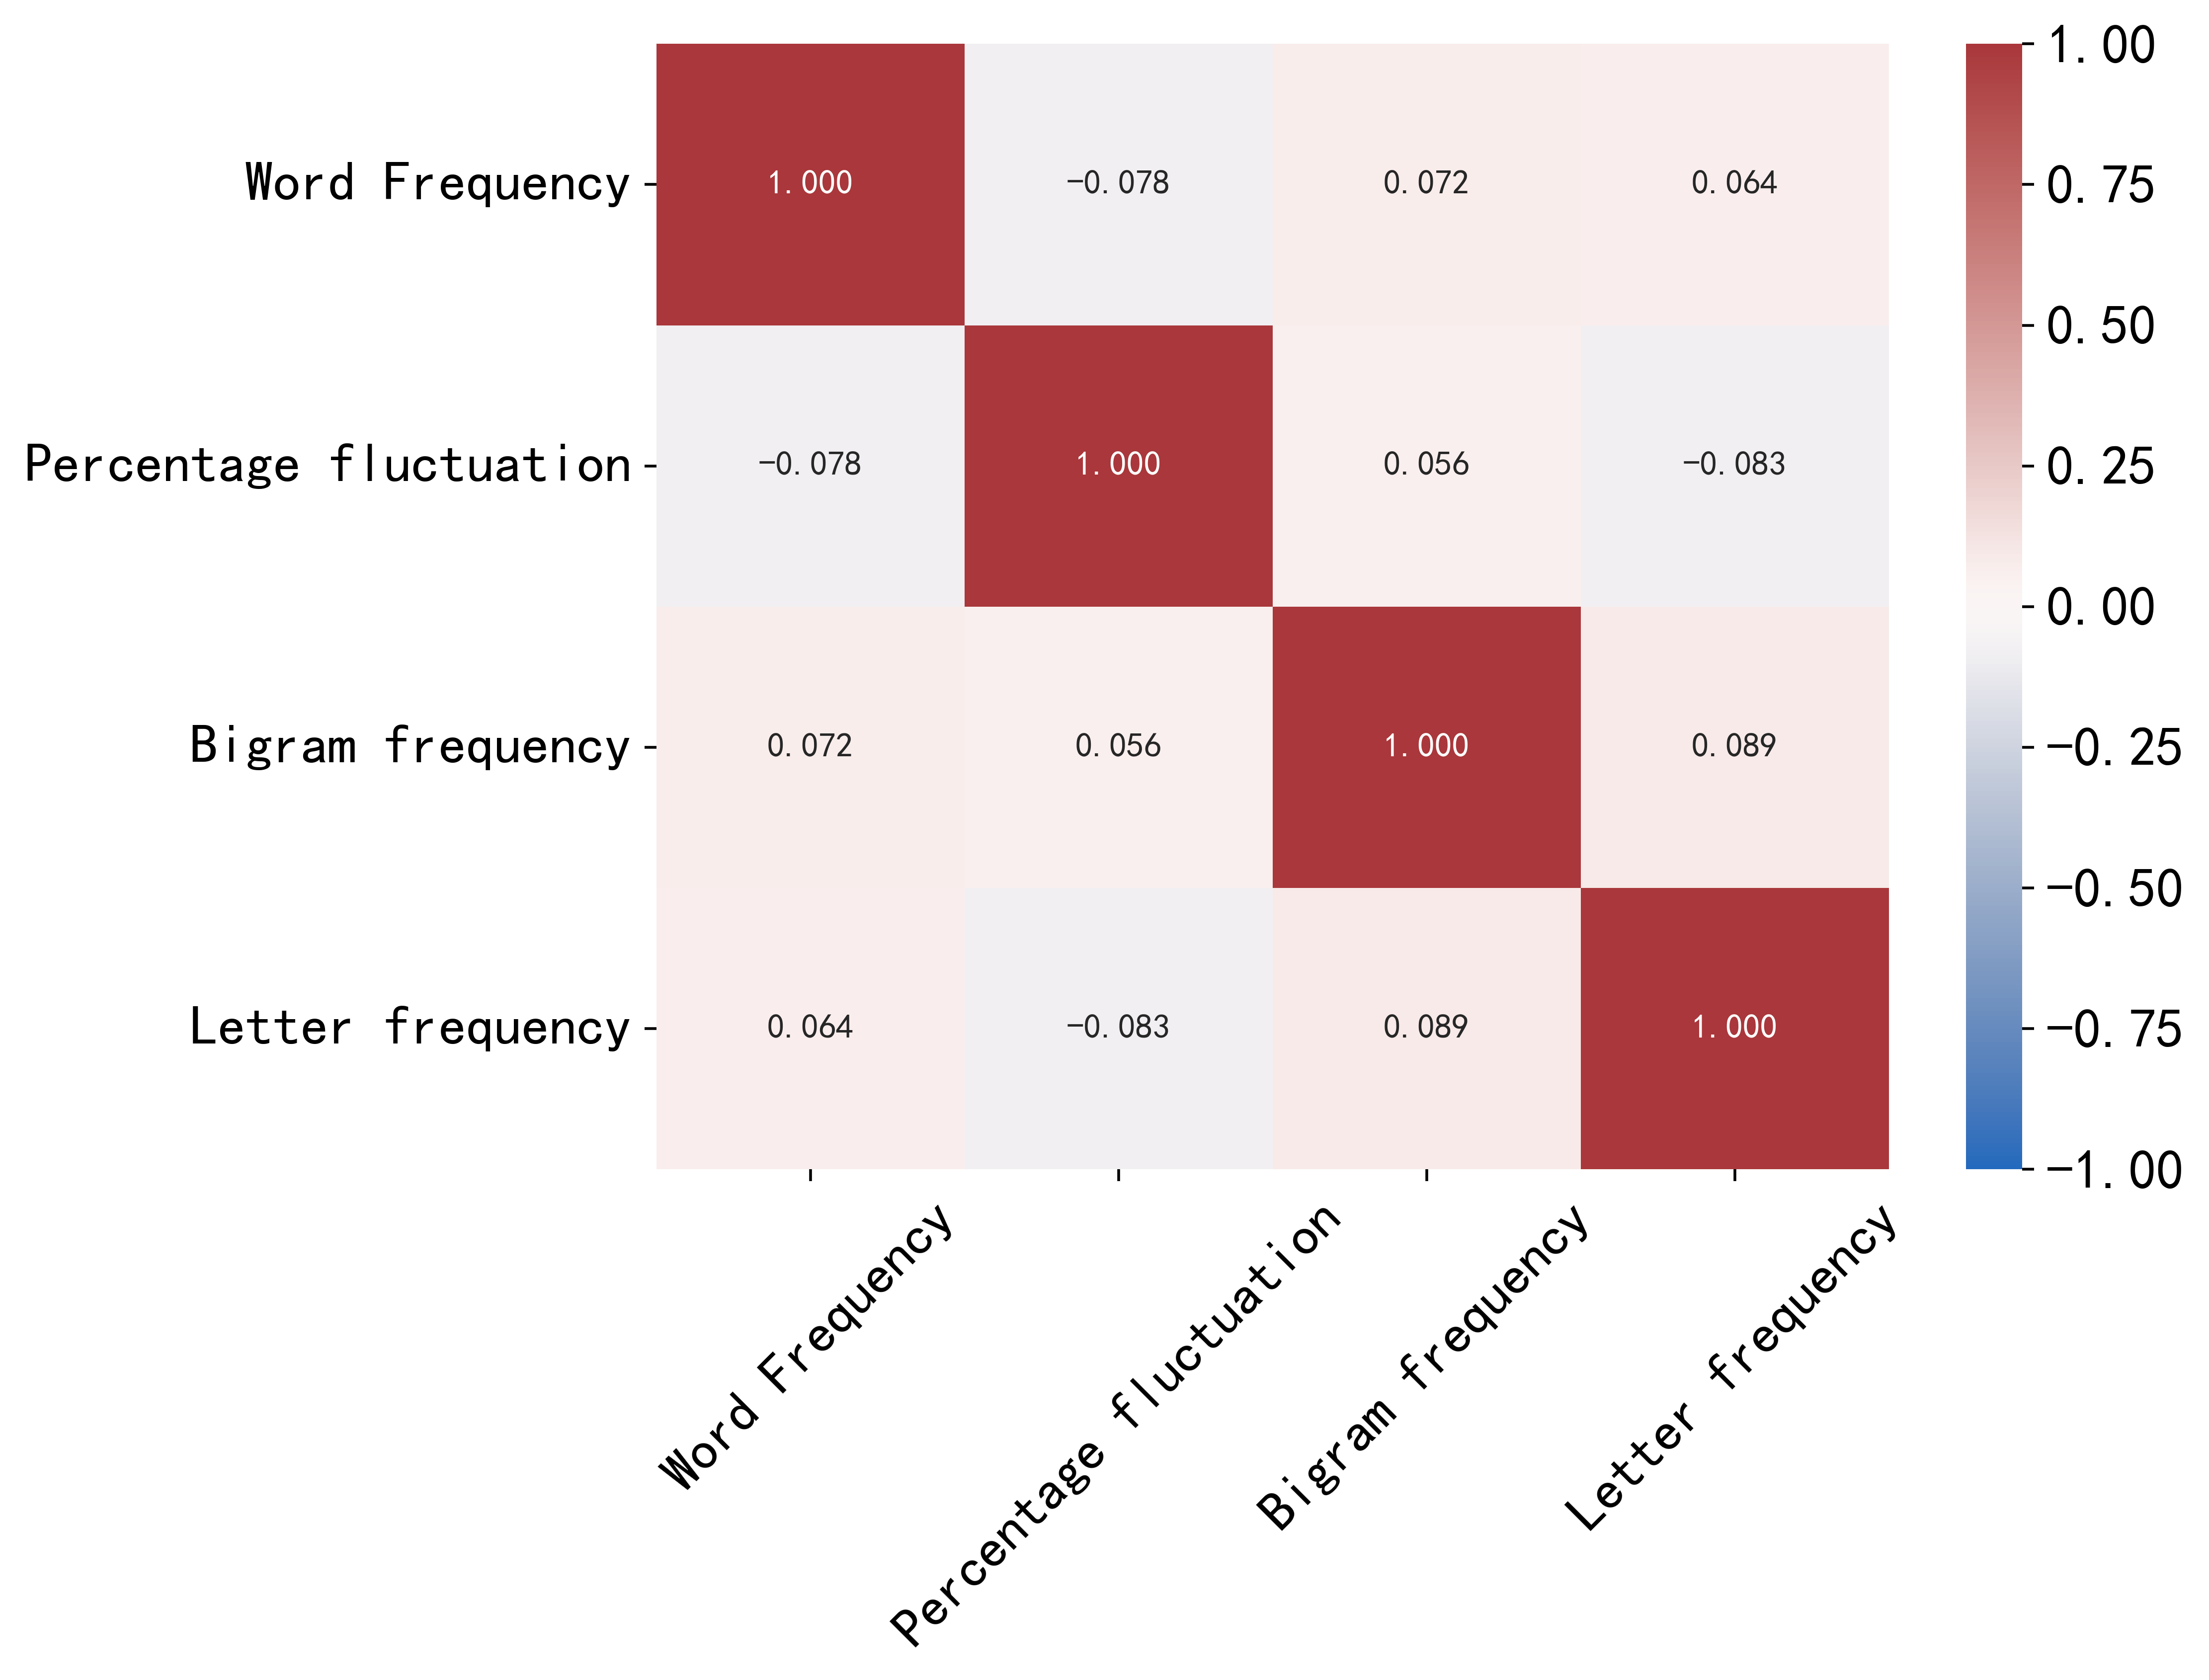

In [157]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(8,6))
ax = sns.heatmap(correlations, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(['Word Frequency', 'Percentage fluctuation', 'Bigram frequency', 'Letter frequency'], rotation=45)
ax.set_yticklabels(['Word Frequency', 'Percentage fluctuation', 'Bigram frequency', 'Letter frequency'], rotation='horizontal')
plt.savefig('C:\\Users\\86180\\Desktop\\美赛\\2023\\heatmap.svg',dpi=1500)
plt.show()

In [151]:
## 均方误差
MSE=[]
MAE=[]
for i in range(359):
    mse=0
    mae=0
    for j in range(7):
        mse+=(df_o.iloc[i][j]-100* df_e.iloc[i][j])**2
        mae+=abs(df_o.iloc[i][j]-100* df_e.iloc[i][j])
    MSE.append(mse/7)
    MAE.append(mae/7)
MAE

[1.2515620625887496,
 2.198502817834521,
 7.320429762175277,
 4.499938294916462,
 6.382969630747448,
 4.032585141219875,
 7.686439694221614,
 3.9711977874999342,
 4.284506633320763,
 7.037354323672572,
 1.7314564393231753,
 12.13296765399684,
 3.1051227139918076,
 3.039534063990643,
 1.2284664670319645,
 4.393547740659329,
 0.9791982651183572,
 6.764331511447516,
 0.9233755949135354,
 3.716265899794355,
 1.21094740736188,
 2.876098700151341,
 1.3433883802267077,
 4.24357515091976,
 5.05728774903838,
 3.7019831885090615,
 4.991792452073187,
 5.4830758334516565,
 2.556635118752172,
 0.9601463616524569,
 1.6643867063116318,
 9.146313166220338,
 4.2212392591255465,
 2.3782229949931164,
 5.477514089727323,
 7.061787406620328,
 1.837528937803778,
 1.229974122252761,
 2.669654342847096,
 0.9428845227564372,
 2.6357420160818847,
 5.0377707916883745,
 6.886065689157825,
 9.175548674295687,
 5.248612038673789,
 2.261310100636156,
 5.199827655495304,
 6.65168634661348,
 1.771176690258798,
 8.1791

In [124]:
abs(df_o.iloc[1][2]-100* df_e.iloc[1][2])

0.27866577965770034

In [126]:
df_o.iloc[1][2]
df_e.iloc[1][2]

0.232786657796577

In [152]:
np.mean(MSE)

39.937309878521596

In [153]:
np.mean(MAE)

4.434355662042763